In [3]:
# 2020 and 2019
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Kickstarter_final_ver_2.csv')

In [4]:
df

,Unnamed: 0,backers_count,blurb,country,current_currency,disable_communication,fx_rate,id,is_starrable,name,...,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year
0,6901,2,Lets provide Cape Verde with the same activiti...,NL,USD,0,1.113333,1085396042,0,A brand new fast food & entertainment chain in...,...,121.0,3,58,3,0,food,9,0.0,1,2020
1,10734,67,Mobile Application and Online Community addres...,US,USD,0,1.000000,601978488,0,RIDME,...,88.0,4,5,5,0,fashion,2,0.0,1,2020
2,14508,43,The Rising of the Shield Hero Enamel Pins,US,USD,0,1.000000,131421780,0,Unforeseen Heroes,...,41.0,6,17,2,0,art,1,1.0,1,2020
3,15109,35,"Get your DADSIE on!! Overalls one minute, hand...",AU,USD,0,0.689825,986098168,0,the DADSIE,...,63.0,8,10,6,0,fashion,2,0.0,1,2020
4,23703,276,The Cryptid Collection is an Enamel Pin Series...,US,USD,0,1.000000,794850079,0,Cryptid Collection 2019,...,81.0,8,23,2,0,art,1,1.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215653,2020629,55,In 2016 I made a critter a day for the ENTIRE ...,US,USD,0,1.000000,1305740682,0,Help This Calendar Full of Critters Come to Life!,...,131.0,11,49,7,0,publishing,4,1.0,12,2019
215654,2020630,3559,"Atmospheric single-player/co-op RPG set in a ""...",US,USD,0,1.000000,700452989,0,InSomnia - An RPG Set in a Brutal Dieselpunk U...,...,105.0,4,53,10,1,games,7,1.0,12,2019
215655,2020631,44,Seymour Barab is one of America's most inventi...,US,USD,0,1.000000,683017924,0,Recording Barab's Bawd Ballads: a double debut,...,135.0,4,46,4,0,music,3,1.0,12,2019
215656,2020632,17,"PIGBOYS, the photobook series featuring handso...",US,USD,0,1.000000,171527222,0,PIGBOYS: All 3 Books!,...,134.0,7,21,9,0,photography,5,1.0,12,2019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215658 entries, 0 to 215657
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             215658 non-null  int64  
 1   backers_count          215658 non-null  int64  
 2   blurb                  215658 non-null  object 
 3   country                215658 non-null  object 
 4   current_currency       215658 non-null  object 
 5   disable_communication  215658 non-null  int64  
 6   fx_rate                215658 non-null  float64
 7   id                     215658 non-null  int64  
 8   is_starrable           215658 non-null  int64  
 9   name                   215658 non-null  object 
 10  staff_pick             215658 non-null  int64  
 11  usd_pledged            215657 non-null  float64
 12  usd_goal               215658 non-null  float64
 13  duration_days          215658 non-null  float64
 14  blurb_length           215658 non-nu

In [6]:
#columns that arent useful for ML: 'blurb', 'creator', 'currency', 'deadline', 'id', 'name', 'profile', 'slug'
df.drop(['Unnamed: 0','is_starrable','fx_rate','duration_days','country','current_currency'], axis = 1, inplace = True)

In [7]:
df

,backers_count,blurb,disable_communication,id,name,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year
0,2,Lets provide Cape Verde with the same activiti...,0,1085396042,A brand new fast food & entertainment chain in...,0,14.405949,16622.248350,121.0,3,58,3,0,food,9,0.0,1,2020
1,67,Mobile Application and Online Community addres...,0,601978488,RIDME,0,5015.000000,100000.000000,88.0,4,5,5,0,fashion,2,0.0,1,2020
2,43,The Rising of the Shield Hero Enamel Pins,0,131421780,Unforeseen Heroes,0,1768.000000,450.000000,41.0,6,17,2,0,art,1,1.0,1,2020
3,35,"Get your DADSIE on!! Overalls one minute, hand...",0,986098168,the DADSIE,0,4222.662018,7668.289310,63.0,8,10,6,0,fashion,2,0.0,1,2020
4,276,The Cryptid Collection is an Enamel Pin Series...,0,794850079,Cryptid Collection 2019,0,7163.000000,1200.000000,81.0,8,23,2,0,art,1,1.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215653,55,In 2016 I made a critter a day for the ENTIRE ...,0,1305740682,Help This Calendar Full of Critters Come to Life!,1,1589.000000,1250.000000,131.0,11,49,7,0,publishing,4,1.0,12,2019
215654,3559,"Atmospheric single-player/co-op RPG set in a ""...",0,700452989,InSomnia - An RPG Set in a Brutal Dieselpunk U...,0,92268.290000,70000.000000,105.0,4,53,10,1,games,7,1.0,12,2019
215655,44,Seymour Barab is one of America's most inventi...,0,683017924,Recording Barab's Bawd Ballads: a double debut,0,10090.000000,10000.000000,135.0,4,46,4,0,music,3,1.0,12,2019
215656,17,"PIGBOYS, the photobook series featuring handso...",0,171527222,PIGBOYS: All 3 Books!,0,1997.000000,1850.000000,134.0,7,21,9,0,photography,5,1.0,12,2019


In [8]:
df.loc[df['id'] == 1240927615]

,backers_count,blurb,disable_communication,id,name,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year
37,0,123MOVIES WATCH JUMANJI: THE NEXT LEVEL 2019 F...,1,1240927615,WATCH JUMANJI: THE NEXT LEVEL 2019 FULL MOVIE ...,0,NaN,0.0,112.0,62,72,46,0,film & video,11,NaN,2,2020


In [9]:
df.dropna(subset = ["goal_reached"], inplace=True)

In [10]:
df.loc[df['id'] == 1240927615]

,backers_count,blurb,disable_communication,id,name,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year


In [11]:
df.isnull().sum()

backers_count            0
blurb                    0
disable_communication    0
id                       0
name                     0
staff_pick               0
usd_pledged              0
usd_goal                 0
blurb_length             0
blurb_caps               0
name_length              0
name_caps                0
repeat_creator           0
overarching_category     0
page_position            0
goal_reached             0
Month                    0
Year                     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215657 entries, 0 to 215657
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   backers_count          215657 non-null  int64  
 1   blurb                  215657 non-null  object 
 2   disable_communication  215657 non-null  int64  
 3   id                     215657 non-null  int64  
 4   name                   215657 non-null  object 
 5   staff_pick             215657 non-null  int64  
 6   usd_pledged            215657 non-null  float64
 7   usd_goal               215657 non-null  float64
 8   blurb_length           215657 non-null  float64
 9   blurb_caps             215657 non-null  int64  
 10  name_length            215657 non-null  int64  
 11  name_caps              215657 non-null  int64  
 12  repeat_creator         215657 non-null  int64  
 13  overarching_category   215657 non-null  object 
 14  page_position          215657 non-nu

In [13]:
df.loc[df['backers_count'] == 105857]

,backers_count,blurb,disable_communication,id,name,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year
135168,105857,Bring Reading Rainbow’s library of interactive...,0,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",1,5408916.95,1000000.0,135.0,3,55,7,0,technology,15,1.0,12,2019


In [14]:
df_2019 = df.loc[df['Year'] == 2019]

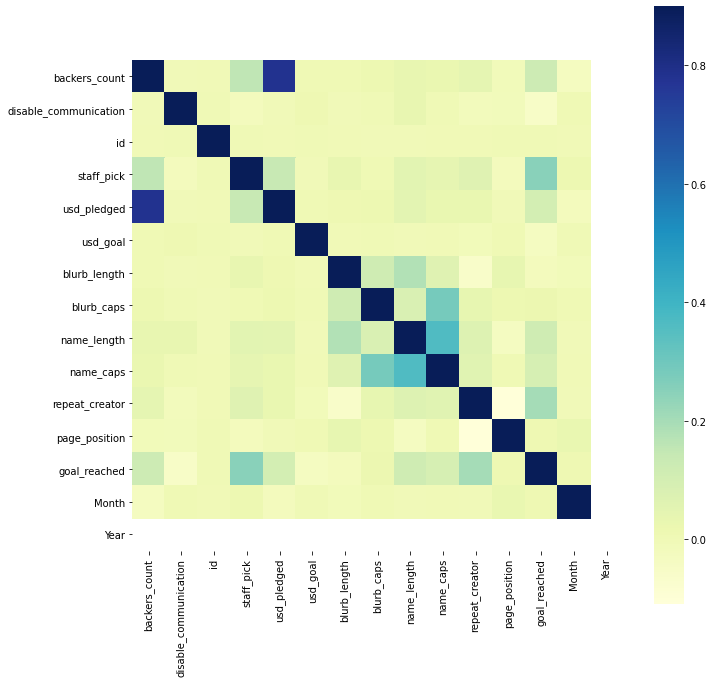

In [20]:
import matplotlib.pyplot as plt
corr = df_2019.corr()
plt.subplots(figsize=(11,11))
sns.heatmap(corr, vmax=0.9,cmap="YlGnBu", square=True)

In [15]:
df_2020 = df.loc[df['Year'] == 2020]

In [16]:
df_2020.usd_goal.describe()

count    2.569100e+04
mean     2.618948e+04
std      9.757653e+05
min      5.114279e-01
25%      1.000000e+03
50%      3.691944e+03
75%      1.000000e+04
max      1.182690e+08
Name: usd_goal, dtype: float64

In [ ]:
#extract key features and communicate what they mean
tv = df['goal_reached'].value_counts()
print(tv)
print(tv[1]/(tv[0]+tv[1]))

In [ ]:
#extract key features and communicate what they mean
tv = df_2019['goal_reached'].value_counts()
print(tv)
print(tv[1]/(tv[0]+tv[1]))

In [ ]:
#extract key features and communicate what they mean
tv = df_2020['goal_reached'].value_counts()
print(tv)
print(tv[1]/(tv[0]+tv[1]))

In [ ]:
sns.distplot(df['goal_reached'])

In [ ]:
df.backers_count.describe()

In [ ]:
#plot the scatter plot of balance and age variable in data
df.plot.scatter(x="backers_count",y="goal_reached")
plt.show()

In [ ]:
df_2019.groupby('goal_reached')['backers_count'].mean().plot.bar()

plt.show()

In [ ]:
df_2020.groupby('goal_reached')['backers_count'].mean().plot.bar()
plt.show()

In [ ]:
df_2019.groupby('goal_reached')['backers_count'].mean()

In [ ]:
df_2020.groupby('goal_reached')['backers_count'].mean()

In [ ]:
437.996624 - 261.423061

In [ ]:
df.usd_pledged.describe()

In [ ]:
df.groupby('repeat_creator')['goal_reached'].count()

In [ ]:
df.groupby('repeat_creator')['goal_reached'].count().plot.bar()
plt.show()

In [ ]:
# Let's calculate the percentage of category.
df.overarching_category.value_counts(normalize=True)

In [ ]:
#plot the bar graph of percentage job categories
df.overarching_category.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkgreen','darkred')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(df.usd_pledged/1e6, df.usd_goal/1e6, hue=df.goal_reached, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,None), xlim=(-1,None))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
def categorical_with_per_count(kick, feature):
    '''
    Calculate frequency of the categorical feature with % and count base.
    Sorted on the descending order.
    '''
    
    # calculate frequency on % and value
    freq_merged = pd.concat([kick[feature].value_counts(normalize=True) * 100,
                             kick[feature].value_counts(normalize=False)], axis=1)
    # rename columns
    freq_merged.columns = [feature + '_%', feature + '_count']
    return freq_merged

In [ ]:
categorical_with_per_count(df, 'goal_reached')

In [ ]:
# frequency of the main category
categorical_with_per_count(df, 'overarching_category')

In [ ]:
# change dimension of the plot
dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)
# barplot of the main categories by descending order
sns.countplot(
    y=df.overarching_category,
    order = df['overarching_category'].value_counts().index
)

In [ ]:
categorical_with_per_count(df, 'country').head(n=10)

In [ ]:
# Most successful categories based on counts
dims = (10, 7)
fig, ax = plt.subplots(figsize = dims)
sns.countplot(x='overarching_category', palette="pastel",data= df[df['goal_reached'] == 1].groupby("overarching_category")
              .filter(lambda x: len(x) > 3000), ax=ax)

In [ ]:
# Least successful categories based on counts
dims = (10, 7)
fig, ax = plt.subplots(figsize = dims)
sns.countplot(x='overarching_category', palette="Paired",data= df[df['goal_reached'] == 0]
              .groupby("overarching_category").filter(lambda x: len(x) > 4500), ax=ax)

In [ ]:
frame = pd.DataFrame()
counts = df.overarching_category.value_counts()
succ = df[df.goal_reached == 1].overarching_category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['overarching_category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
so = frame.sort_values('Percent').tail(10)
high = frame.sort_values('Percent').head(10)

In [ ]:
# Most successful categories based on  rate
dims = (12, 7)
fig, ax = plt.subplots(figsize = dims)
sns.barplot(x='overarching_category',y = 'Percent', palette="rocket_r",data = so, ax=ax)

#Surprisingly, comics is most successful category with more than 80 percent success rate

In [ ]:
# Least successful categories based on percent
dims = (12, 7)
fig, ax = plt.subplots(figsize = dims)
sns.barplot(x='overarching_category',y = 'Percent', palette="rocket_r",data = high, ax=ax)

In [ ]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

df2 = df.groupby(['overarching_category', 'goal_reached'])['overarching_category'].count().unstack('goal_reached').fillna(0)
#order=df['animals'].value_counts().index
#.fillna(0)
#plot_order = death.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=False).index.values
df2[[1,0]].plot(kind='bar', stacked=True, figsize=(15, 5))

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df['overarching_category'], df['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(17,7),stacked=True, rot=0, color=pal)
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Categories")

plt.xlabel('Category')
plt.ylabel('Success/ Failure Rate Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

In [ ]:
df.usd_goal.describe()

In [ ]:
# calculate frequency of the goal: the most popular goal
categorical_with_per_count(df, 'usd_goal').head(n=10)

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (12, 7)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.usd_goal, ax=ax1)
sns.distplot(np.log1p(df.usd_goal), ax=ax2)

In [ ]:
# Code to understand skew

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(20, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(newdf.columns), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(newdf.columns)), 3, i)
    sns.distplot(newdf[feature])
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [ ]:
# In[5]:


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplot(3, 3, 1)
sns.distplot(df['name_caps'])
plt.subplot(3, 3, 2)
sns.distplot(df['page_position'])
plt.subplot(3, 3, 3)
sns.distplot(df['blurb_caps'])

In [ ]:
# In[6]:


#code to fix skew in key variables

df['name_caps'] = np.log1p(df['name_caps'])
df['page_position'] = np.log1p(df['page_position'])
df['blurb_caps'] = np.log1p(df['blurb_caps'])
# max_blurb = np.max(df['blurb_length'])
# df['blurb_length'] = np.log1p((1+max_blurb)-df['blurb_length'])
# sns.distplot(df['blurb_length'])
print('done')

In [1]:
df_2019

NameError: name 'df_2019' is not defined

In [ ]:
# frequency of the main category
categorical_with_per_count(df_2019, 'overarching_category')

In [ ]:
# change dimension of the plot
dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)
# barplot of the main categories by descending order
sns.countplot(
    y=df_2019.overarching_category,
    order = df_2019['overarching_category'].value_counts().index
)

In [ ]:
frame = pd.DataFrame()
counts = df_2019.overarching_category.value_counts()
succ = df_2019[df_2019.goal_reached == 1].overarching_category.value_counts()


rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['overarching_category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
so = frame.sort_values('Percent').tail(10)
high = frame.sort_values('Percent').head(10)
# Most successful categories based on  rate
dims = (12, 7)
fig, ax = plt.subplots(figsize = dims)
sns.barplot(x='overarching_category',y = 'Percent', palette="rocket_r",data = so, ax=ax)

#Surprisingly, comics is most successful category with more than 80 percent success rate

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df_2019['overarching_category'], df_2019['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(17,7),stacked=True, rot=0, color=pal)
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.0), title="Goal Reached")

plt.xlabel('Category')
plt.ylabel('Success/ Failure Rate Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.title('Successful Rate of Projects by Category in 2019', fontsize = 16)
plt.show()

In [ ]:
df_2020 = df.loc[df['Year'] == 2020]
df_2020

In [ ]:
# frequency of the main category
categorical_with_per_count(df_2020, 'overarching_category')

In [ ]:
# change dimension of the plot
dims = (6, 6)
fig, ax = plt.subplots(figsize = dims)
palette ={"design": "#653700", "comics": "#D2681E", "games": "C1", "art": "tan", "publishing": "wheat",
            "music":"#F0E68C", "theater":"#8c564b", "photography":"#7f7f7f", "fashion":"#AAA662", "dance":"k",
             "technology":"sienna", "film & video":"#C79FEF", "journalism":"r","food":"g","crafts":"silver"}
# barplot of the main categories by descending order
sns.countplot(
    y=df_2020.overarching_category,
    order = df_2020['overarching_category'].value_counts().index,
    palette=palette
)
plt.title('Raking of Category Frequency on Kickerstarter in 2020', fontsize = 15)
plt.xlabel('Count')
plt.ylabel('Category')

In [ ]:
# change dimension of the plot
dims = (6, 6)
fig, ax = plt.subplots(figsize = dims)
palette ={"design": "#653700", "comics": "#D2681E", "games": "C1", "art": "tan", "publishing": "wheat",
            "music":"#F0E68C", "theater":"#8c564b", "photography":"#7f7f7f", "fashion":"#AAA662", "dance":"k",
             "technology":"sienna", "film & video":"#C79FEF", "journalism":"r","food":"g","crafts":"silver"}
# barplot of the main categories by descending order
sns.countplot(
    y=df_2019.overarching_category,
    order = df_2019['overarching_category'].value_counts().index,
    palette=palette
)
plt.title('Raking of Category Frequency on Kickerstarter in 2019', fontsize = 15)
plt.xlabel('Count')
plt.ylabel('Category')

In [ ]:
frame = pd.DataFrame()
counts = df_2020.overarching_category.value_counts()
succ = df_2020[df_2020.goal_reached == 1].overarching_category.value_counts()
palette ={"design": "#653700", "comics": "#D2681E", "games": "C1", "art": "tan", "publishing": "wheat",
            "music":"#F0E68C", "theater":"#8c564b", "photography":"#7f7f7f", "fashion":"#AAA662", "dance":"k"}
rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['overarching_category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
so = frame.sort_values('Percent').tail(10)
high = frame.sort_values('Percent').head(10)
# Most successful categories based on  rate
dims = (8.7, 5.8)
fig, ax = plt.subplots(figsize = dims)
sns.barplot(x='overarching_category',y = 'Percent',data = so, palette=palette, ax=ax)
plt.title('Most Successful Projects by Category in 2020', fontsize = 15)
plt.xlabel('Category')
#Surprisingly, comics is most successful category with more than 80 percent success rate

In [ ]:
frame = pd.DataFrame()
counts = df_2019.overarching_category.value_counts()
succ = df_2019[df_2019.goal_reached == 1].overarching_category.value_counts()
palette ={"design": "#653700", "comics": "#D2681E", "games": "C1", "art": "tan", "publishing": "wheat",
            "music":"#F0E68C", "theater":"#8c564b", "fashion":"#AAA662", "dance":"k", "film & video":"#C79FEF"}
rows_list = []
for i in counts.keys():
    dict1 = {}
    # get input row in dictionary format
    # key = col_name
    dict1['overarching_category'] = i
    dict1['Percent'] = succ[i] / counts[i] * 100
    rows_list.append(dict1)

frame = pd.DataFrame(rows_list)   
so = frame.sort_values('Percent').tail(10)
high = frame.sort_values('Percent').head(10)
# Most successful categories based on  rate
dims = (8.5, 5.8)
fig, ax = plt.subplots(figsize = dims)
sns.barplot(x='overarching_category',y = 'Percent',data = so, palette=palette, ax=ax)
plt.title('Most Successful Projects by Category in 2019', fontsize = 15)
plt.xlabel('Category')
#Surprisingly, comics is most successful category with more than 80 percent success rate

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df_2020['overarching_category'], df_2020['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(17,7),stacked=True, rot=0, color=pal)
display(ax)
plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.0), title="Goal Reached")

plt.xlabel('Category')
plt.ylabel('Success/ Failure Rate Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.title('Successful Rate of Projects by Category in 2020', fontsize = 16)
plt.show()

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
df_2020.sort_values('goal_reached')
ax= pd.crosstab(df_2020['overarching_category'], df_2020['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(17,7),stacked=True, rot=0, color=pal)
display(ax)
plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.0), title="Goal Reached")

plt.xlabel('Category')
plt.ylabel('Success/ Failure Rate Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.title('Successful Rate of Projects by Category in 2020', fontsize = 16)
plt.show()

In [ ]:
df_2020.groupby('overarching_category')['usd_goal_million'].sum().plot.bar()
df_2020 = df_2020.sort_values('usd_goal_million')
plt.show()

In [ ]:
df_2020.groupby('goal_reached')['repeat_creator'].sum().plot.bar()
df_2020 = df_2020.sort_values('usd_goal_million')
plt.show()

In [17]:
group = df_2020.groupby('overarching_category')['usd_goal'].mean()
group

overarching_category
art               5204.730879
comics            6907.540649
crafts            6165.086226
dance            10632.375127
design           12875.010780
fashion          12695.444313
film & video    101387.148410
food             35472.404216
games            10334.608062
journalism       31040.566957
music             8448.549678
photography       8813.877810
publishing        6795.445736
technology       86155.481291
theater           9547.281179
Name: usd_goal, dtype: float64

In [ ]:
df.usd_goal.describe()

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.usd_goal, ax=ax1)
sns.distplot(np.log1p(df.usd_goal), ax=ax2)

In [ ]:
# calculate frequency of the goal: the most popular goal
categorical_with_per_count(df, 'usd_goal').head(n=10)

In [ ]:
ax = sns.boxplot(x=df["usd_goal"])
ax.set_xlabel("Fundraiser's Investment Goal")

In [ ]:
df.page_position.describe()

In [ ]:
ax = sns.boxplot(x=df["page_position"])
ax.set_xlabel("Page position")

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.page_position, ax=ax1)
sns.distplot(np.log1p(df.page_position), ax=ax2)

In [ ]:
df.name_length.describe()

In [ ]:
ax = sns.boxplot(x=df["name_length"])
ax.set_xlabel("Project Title Length")

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.name_length, ax=ax1)

In [ ]:
df.name_caps.describe()

In [ ]:
ax = sns.boxplot(x=df["name_caps"])
ax.set_xlabel("Project Title Capitalization")

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.name_caps, ax=ax1)
sns.distplot(np.log1p(df.name_caps), ax=ax2)

In [ ]:
df.blurb_length.describe()

In [ ]:
ax = sns.boxplot(x=df["blurb_length"])
ax.set_xlabel("Project Blurb Length")

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.blurb_length, ax=ax1)

In [ ]:
df.blurb_caps.describe()

In [ ]:
ax = sns.boxplot(x=df["blurb_caps"])
ax.set_xlabel("Project Blurb Length")

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.blurb_caps, ax=ax1)
sns.distplot(np.log1p(df.blurb_caps), ax=ax2)

In [ ]:
df.info()

In [ ]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkgreen','darkred')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(df.usd_pledged/1e6, df.usd_goal/1e6, hue=df.goal_reached, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,None), xlim=(-1,None))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')

In [ ]:
df

In [ ]:
#columns that arent useful for ML: 'blurb', 'creator', 'currency', 'deadline', 'id', 'name', 'profile', 'slug'
df.drop(['is_starrable'], axis = 1, inplace = True)

In [ ]:
df

In [ ]:
print(df.columns)

In [ ]:
df['duration_days'].describe()

In [ ]:
ax = sns.boxplot(x=df["duration_days"])
ax.set_xlabel("Duration")

In [ ]:
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df.duration_days, ax=ax1)

In [ ]:
# In[6]:


#code to fix skew in key variables

df['name_caps'] = np.log1p(df['name_caps'])
df['page_position'] = np.log1p(df['page_position'])
df['blurb_caps'] = np.log1p(df['blurb_caps'])
# max_blurb = np.max(df['blurb_length'])
# df['blurb_length'] = np.log1p((1+max_blurb)-df['blurb_length'])
# sns.distplot(df['blurb_length'])
print('done')

In [ ]:
# Code to understand skew

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(20, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(newdf.columns), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(newdf.columns)), 3, i)
    sns.distplot(newdf[feature])
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [ ]:
# In[5]:


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplot(3, 3, 1)
sns.distplot(df['name_caps'])
plt.subplot(3, 3, 2)
sns.distplot(df['page_position'])
plt.subplot(3, 3, 3)
sns.distplot(df['blurb_caps'])

In [ ]:
# In[6]:


#code to fix skew in key variables

df['name_caps'] = np.log1p(df['name_caps'])
df['page_position'] = np.log1p(df['page_position'])
df['blurb_caps'] = np.log1p(df['blurb_caps'])
# max_blurb = np.max(df['blurb_length'])
# df['blurb_length'] = np.log1p((1+max_blurb)-df['blurb_length'])
# sns.distplot(df['blurb_length'])
print('done')


In [ ]:
# In[22]:



#columns that arent useful for ML: 'blurb', 'creator', 'currency', 'deadline', 'id', 'name', 'profile', 'slug'

train_df = pd.get_dummies(df)
X = train_df.drop(['goal_reached','usd_pledged', 'backers_count' ], axis = 1)
print(X.columns)
#, 'usd_pledged', 'backers_count' 
y = train_df['goal_reached']
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#need more feature engineering / feature analysis
print('done')

In [ ]:
#A common problem in data analysis projects is to determine whether two categorical variables are independent
# Chi-square test
cont_table = pd.crosstab(df['goal_reached'], df['repeat_creator'])

# Print the contingency table
cont_table

In [ ]:
cont_table.plot(kind="bar", stacked=True, rot=0)

In [ ]:
from scipy import stats
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

In [ ]:
#A common problem in data analysis projects is to determine whether two categorical variables are independent
# Chi-square test
cont_table_2 = pd.crosstab(df['goal_reached'], df['staff_pick'])

# Print the contingency table
cont_table_2

In [ ]:
cont_table_2.plot(kind="bar", stacked=True, rot=0)

In [ ]:
from scipy import stats
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table_2)
print(f"p-value: {p_val}")

In [ ]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkgreen','darkred')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(df_2019.usd_pledged/1e6, df_2019.usd_goal/1e6, hue=df_2019.goal_reached, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,None), xlim=(-1,None))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')

In [ ]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkgreen','darkred')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(df_2020.usd_pledged/1e6, df_2020.usd_goal/1e6, hue=df_2020.goal_reached, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,None), xlim=(-1,None))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')

In [ ]:
df.info()

In [ ]:
df['usd_pledged'] = df['usd_pledged'].apply(np.int64)
df['usd_goal'] = df['usd_goal'].apply(np.int64)

In [ ]:
df.info()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
df_2019.groupby(['Month']).count()['usd_pledged'].plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2020.groupby(['Month']).sum()['usd_pledged_million'].plot(ax=ax)
plt.title("Total Pledge by Month in 2020", size=13.5)

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2019.groupby(['Month']).sum()['usd_pledged_million'].plot(ax=ax)
plt.title("Total Pledge by Month in 2019", size=13.5)
ax.set_ylabel('Total Pledge in Million')
ax.set_xlabel('Month')

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2019.groupby(['Month']).sum()['repeat_creator'].plot(ax=ax)
plt.title("Repeat Creator by Month in 2019", size=13.5)
ax.set_ylabel('Total Experienced Creator')
ax.set_xlabel('Month')

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2019.groupby(['Month']).sum()['staff_pick'].plot(ax=ax)
plt.title("Projects Picked by Staff in 2019", size=13.5)
ax.set_ylabel('Total Campaigns Picked by Staff')
ax.set_xlabel('Month')

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2020.groupby(['Month']).sum()['staff_pick'].plot(ax=ax)
plt.title('Projects Picked by Staff in 2020',size=13.5)
ax.set_xlabel('Month')

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2020.groupby(['Month']).sum()['repeat_creator'].plot(ax=ax)
plt.title('Repeat Creator by Month in 2020',size=13.5)
ax.set_xlabel('Month')

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2020.groupby(['Month']).sum()['usd_goal_million'].plot(ax=ax)
plt.title('Total Goal by Month in 2020',size=13.5)
ax.set_xlabel('Month')

In [ ]:
df.groupby(['Month']).sum()['usd_goal_million']

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
df_2019.groupby(['Month']).sum()['usd_goal_million'].plot(ax=ax)
plt.title('Total Goal by Month in 2019',size=13.5)
ax.set_ylabel('Goal in Million')
ax.set_xlabel('Month')

In [ ]:
sns.lineplot('Month', 'staff_pick', ci=None, 
             hue='Year', data=df)

In [ ]:
df["Year"].unique()

In [ ]:
sns.lineplot('Month', 'usd_pledged', ci=None, 
             hue='Year', data=df)

In [ ]:
lp = sns.lineplot('Month', 'usd_pledged', ci=None, 
             hue='overarching_category', data=df_2019)
lp.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

In [ ]:
lp = sns.lineplot('Month', 'usd_pledged', ci=None, 
             hue='overarching_category', data=df_2020)
lp.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

In [ ]:
lp = sns.lineplot('Month', 'usd_goal', ci=None, 
             hue='overarching_category', data=df_2019)
lp.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

In [ ]:
lp = sns.lineplot('Month', 'usd_pledged_million', ci=None, 
             hue='Year', data=df)
lp.legend(loc='upper right', bbox_to_anchor=(1, 1))

In [ ]:
g = sns.FacetGrid(df, col='Year', hue='goal_reached')
g = g.map(sns.lineplot, 'Year', 'usd_pledged_million', ci=None).add_legend()

In [18]:
df_2020['usd_pledged_million'] = df_2020['usd_pledged']/1e6

<ipython-input-18-a01f4f2fe510>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['usd_pledged_million'] = df_2020['usd_pledged']/1e6


In [19]:
df_2020['usd_pledged_million'].describe()

count    25691.000000
mean         0.027960
std          0.186844
min          0.000000
25%          0.000530
50%          0.002800
75%          0.010973
max         12.969608
Name: usd_pledged_million, dtype: float64

In [ ]:
g = sns.FacetGrid(df, col='Year', hue='goal_reached')
g = g.map(sns.lineplot, 'Month', 'usd_pledged_million', ci=None).add_legend()
fig = plt.gcf()
fig.set_size_inches(22, 10)
fig.suptitle('Average Goal Amount by Month', size=16)

In [ ]:
g = sns.FacetGrid(df, col='Year', hue='goal_reached')
g = g.map(sns.lineplot, 'Month', 'usd_goal_million', ci=None).add_legend()
fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.suptitle('Average Goal Amount by Month', size=20)

In [ ]:
df['usd_goal_million'] = df['usd_goal']/1e6
g = sns.FacetGrid(df, col='Year', hue='overarching_category')
g = g.map(sns.lineplot, 'Month', 'usd_goal_million', ci=None).add_legend()
fig = plt.gcf()
fig.set_size_inches(20, 8)

In [ ]:
g = sns.FacetGrid(df, col='Year', hue='goal_reached')
g = g.map(sns.lineplot, 'Month', 'backers_count', ci=None).add_legend()
fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.suptitle('Average Number of Backers by Month', size=20)

In [ ]:
# frequency of the main category
categorical_with_per_count(df_2020, 'usd_pledged')

In [ ]:
ax = sns.barplot(x="Year", y="usd_goal_million", hue="overarching_category", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(12,8.27)})

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'usd_pledged_million',
            hue = 'Year',
            data = df,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'backers_count',
            hue = 'goal_reached',
            data = df,
            order=df.sort_values('backers_count').overarching_category,
            estimator = np.sum,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Association of Backers and Success of Projects', fontsize = 17)
plt.xlabel('Category')
plt.ylabel('Number of Backers')
plt.show()
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'usd_pledged_million',
            hue = 'Year',
            data = df,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Average Amount of Funding for A Project by Category in 2019 and 2020', fontsize = 17)
plt.xlabel('Category')
plt.ylabel('Pledge in Million')
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'usd_goal_million',
            hue = 'Year',
            data = df,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Average Amount of Goal for A Project by Category in 2019 and 2020', fontsize = 17)
plt.xlabel('Category')
plt.ylabel('Goal in Million')
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'backers_count',
            hue = 'Year',
            data = df,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Average Backers for A Project by Category in 2019 and 2020', fontsize = 17)
plt.xlabel('Category')
plt.ylabel('Backers')
plt.show()

In [ ]:
df_2019

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'repeat_creator',
            y = 'goal_reached',
            hue = 'Year',
            data = df,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(8,5)})
# Show the plot
plt.show()

In [ ]:
ax = sns.barplot(x="overarching_category", y="usd_pledged_million", hue="Year", data=df_2019)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(12,8.27)})

In [ ]:
df['usd_pledged_million'] = df['usd_pledged']/1e6
df['usd_pledged_million'].describe()

In [ ]:
df['usd_goal_million'] = df['usd_goal']/1e6
df['usd_goal_million'].describe()

In [ ]:
df_2019['usd_pledged_million'] = df_2019['usd_pledged']/1e6
df_2019['usd_pledged_million'].describe()

In [ ]:
df_2020['usd_pledged_million'] = df_2020['usd_pledged']/1e6
df_2020['usd_pledged_million'].describe()

In [ ]:
df_2020['usd_goal_million'] = df_2020['usd_goal']/1e6
df_2020['usd_goal_million'].describe()

In [ ]:
df_2019['usd_goal_million'] = df_2019['usd_goal']/1e6
df_2019['usd_goal_million'].describe()

In [ ]:
df_2020.groupby('overarching_category')['usd_pledged_million'].mean()

In [ ]:
df_2019.groupby('overarching_category')['usd_pledged_million'].mean()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'usd_goal_million',
            hue = 'goal_reached',
            data = df_2019,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'usd_goal_million',
            hue = 'goal_reached',
            data = df_2020,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'Year',
            y = 'usd_goal_million',
            hue = 'goal_reached',
            data = df,
            estimator = np.sum,
            ci = 0)
sns.set(rc={'figure.figsize':(7,4)})
# Show the plot
plt.show()

In [ ]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkred','darkgreen')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(df_2019.usd_pledged/1e6, df_2019.usd_goal/1e6, hue=df_2019.goal_reached, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,None), xlim=(-1,None))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')
sns.set(rc={'figure.figsize':(8,6)})

In [ ]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkred','darkgreen')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(df_2020.usd_pledged/1e6, df_2020.usd_goal/1e6, hue=df_2020.goal_reached, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,20), xlim=(-1,20))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')
sns.set(rc={'figure.figsize':(8,6)})

In [ ]:
#define colors (darkgreen for successful projects and darkred for failed ones
colors = ('darkred','darkgreen')
#create a plot using seaborn, adjust data to millions
ax = sns.scatterplot(df_2020.usd_pledged/1e6, df_2020.usd_goal/1e6, hue=df_2020.goal_reached, palette=colors)
#add blue line to better visualize the border between failed and successful projects
sns.lineplot(x=(0,50), y=(0,50), color='darkblue')
#set the axes from -1 to their maximum (-1 looks better than 0 actually)
ax.set(ylim=(-1,None), xlim=(-1,None))
#set labels and title
ax.set(xlabel='Amount Pledged in Millions', ylabel='Goal in Millions', title= 'Goal vs. Pledged')
sns.set(rc={'figure.figsize':(8,6)})

In [ ]:
df_2019['usd_goal_million'].describe()

In [ ]:
#we choose the desired grouping intervall ('launched year') and the two variables pledge and goal that we are interested in and sum them up over the years.
data_kick_groupby_year = df_2019.groupby('Month')['usd_pledged_million', 'usd_goal_million'].sum()
#let's use this variable to plot the data over time:
ax = sns.lineplot(x=data_kick_groupby_year.index, y= data_kick_groupby_year.usd_pledged_million, linewidth= 4, label= 'USD Pledged', color= 'darkgreen')
sns.lineplot(x=data_kick_groupby_year.index, y= data_kick_groupby_year.usd_goal_million, linewidth= 4,label='USD Goal', color= 'darkred')
#set labels and title
ax.set(xlabel='2019', ylabel='USD in Million', title='Comparison Pledged vs Goal over Time')

In [ ]:
#we choose the desired grouping intervall ('launched year') and the two variables pledge and goal that we are interested in and sum them up over the years.
data_kick_groupby_year = df_2020.groupby('Month')['usd_pledged_million', 'usd_goal_million'].sum()
#let's use this variable to plot the data over time:
ax = sns.lineplot(x=data_kick_groupby_year.index, y= data_kick_groupby_year.usd_pledged_million, linewidth= 4, label= 'USD Pledged', color= 'darkgreen')
sns.lineplot(x=data_kick_groupby_year.index, y= data_kick_groupby_year.usd_goal_million, linewidth= 4,label='USD Goal', color= 'darkred')
#set labels and title
ax.set(xlabel='2020', ylabel='USD in Million', title='Comparison Pledged vs Goal over Time')

In [ ]:
df_2019.groupby('Month')['usd_pledged_million'].sum()

In [ ]:
df_2019.groupby('Month')['usd_goal_million'].sum()

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2019.usd_pledged/1e6, df_2019.name_length, hue=df_2019.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Character Length of Project Name', title= '2019')
sns.set(rc={'figure.figsize':(10.5,6)})

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.usd_pledged/1e6, df_2020.name_length, hue=df_2020.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Character Length of Project Name', title= '2020')

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.usd_pledged/1e6, df_2020.name_caps, hue=df_2020.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Character Length of Project Name', title= '2020')

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2019.usd_pledged/1e6, df_2019.name_caps, hue=df_2019.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Character Length of Project Name', title= '2019')

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2019.usd_pledged_million, df_2019.blurb_length, hue=df_2019.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Character Length of Project Blurb', title= 'The Importance of Choosing the Right Name')

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.usd_pledged_million, df_2020.blurb_length, hue=df_2020.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Character Length of Project Blurb', title= 'The Importance of Choosing the Right Name')

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'Month',
            y = 'usd_pledged_million',
            hue = 'Year',
            data = df,
            estimator = np.sum,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Total Amount of Pledge by Month in 2019 and 2020', fontsize = 17)
ax.set(xlabel='Pledge in Million')
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'Month',
            y = 'usd_goal_million',
            hue = 'Year',
            data = df,
            estimator = np.sum,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Total Amount of Goal by Month in 2019 and 2020', fontsize = 17)
ax.set(xlabel='Goal in Million')
plt.show()

In [ ]:
ax = sns.scatterplot(x=df_2019.backers_count, y=df_2019.usd_pledged_million, hue=df_2019.goal_reached, palette=colors)
#we set the xlim to 100,000 backers to get a better overview
ax.set(ylim=(-1,None), xlim=(-1,100000))
#set labels and title
ax.set(xlabel='Number of Backers', ylabel='USD Pledged in Million', title= 'Backer vs Pledge')
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
ax = sns.scatterplot(x=df_2020.backers_count, y=df_2020.usd_pledged/1e6, hue=df_2020.goal_reached, palette=colors)
#we set the xlim to 100,000 backers to get a better overview
ax.set(ylim=(-1,None), xlim=(-1,100000))
#set labels and title
ax.set(xlabel='Number of Backers', ylabel='USD Pledged in Million', title= 'Backer vs Pledge')

In [ ]:
#divide usd_pledged_real by number of backers (note that a Zerodivisionerror will occur if we divide by zero resulting in a NaN. We replace these with 0
df_2019['pledge_per_backer'] = df_2019['usd_pledged']/df_2019['backers_count']
#set label and title
ax.set(xlabel='Pledge/Backer Ratio (funding per backer)', ylabel='USD Pledged in Million', title= 'Backer Ratio vs Pledge')

In [ ]:
#divide usd_pledged_real by number of backers (note that a Zerodivisionerror will occur if we divide by zero resulting in a NaN. We replace these with 0
df_2020['pledge_per_backer'] = (df_2020['usd_pledged']//df_2020['backers_count']).fillna(0)
#set label and title
ax.set(xlabel='Pledge/Backer Ratio (funding per backer)', ylabel='USD Pledged in Million', title= 'Backer Ratio vs Pledge')

In [ ]:
df['pledge_per_backer'] = df['usd_pledged']/df['backers_count']

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'pledge_per_backer',
            hue = 'goal_reached',
            data = df_2019,
            estimator = np.sum,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'pledge_per_backer',
            hue = 'Year',
            data = df_2020,
            estimator = np.sum,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
df_successful = df.loc[df['goal_reached'] == 1]
df_successful

In [ ]:
#divide usd_pledged_real by number of backers (note that a Zerodivisionerror will occur if we divide by zero resulting in a NaN. We replace these with 0
df_successful['pledge_per_backer'] = df_successful['usd_pledged']/df_successful['backers_count']
#set label and title
ax.set(xlabel='Pledge/Backer Ratio (funding per backer)', ylabel='USD Pledged in Million', title= 'Backer Ratio vs Pledge')

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'backers_count',
            hue = 'Year',
            data = df_successful,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Number of Backer for Successful Campaigns by Category in 2019 and 2020', fontsize = 17)
plt.xlabel('Category')
plt.ylabel('Average Number of Backers')
plt.show()
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'pledge_per_backer',
            hue = 'Year',
            data = df_successful,
            estimator = np.sum,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'backers_count',
            hue = 'goal_reached',
            data = df,
            estimator = np.sum,
            order=df.sort_values('backers_count').overarching_category,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
df_failure = df.loc[df['goal_reached'] == 0]
df_failure

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'usd_goal_million',
            hue = 'Year',
            data = df,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.show()

In [ ]:
# who v/s fare barplot
sns.barplot(x = 'overarching_category',
            y = 'usd_goal_million',
            hue = 'Year',
            data = df_successful,
            estimator = np.mean,
            ci = 0)
sns.set(rc={'figure.figsize':(20,8.27)})
# Show the plot
plt.title('Average Goal of Successful Projects by Category in 2019 and 2020', size=17)
plt.xlabel('Goal in Million')
plt.ylabel('Category')
plt.show()

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.usd_pledged_million, df_2020.staff_pick, hue=df_2020.goal_reached)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Page Position', title= '2020')

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2019.usd_pledged_million, df_2019.blurb_caps, hue=df_2019.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Number of Blurb Caps', title= '2019')
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.usd_pledged_million, df_2020.blurb_caps, hue=df_2020.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Number of Blurb Caps', title= '2020')
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2019.usd_pledged_million, df_2019.name_caps, hue=df_2019.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Number of Caps in Title', title= '2019')
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.usd_pledged_million, df_2020.name_caps, hue=df_2020.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Number of Caps in Title', title= '2020')
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.usd_pledged_million, df_2020.blurb_length, hue=df_2020.goal_reached)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Number of Characters in Blurb', title= '2020')
sns.set(rc={'figure.figsize':(12,7)})
plt.xlabel('Years', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Monthes', fontsize = 15)
plt.title

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2019.usd_pledged_million, df_2019.blurb_length, hue=df_2019.goal_reached)
#set labels accordingly
ax.set(xlabel='Amount Pledged in Millions', ylabel='Number of Characters in Blurb', title= '2019')
sns.set(rc={'figure.figsize':(12,7)})

In [ ]:
x1 = df_2019.loc[df.goal_reached== 1, 'page_position']
x2 = df_2019.loc[df.goal_reached== 0, 'page_position']

kwargs = dict(alpha=1, bins=15)

plt.hist(x1, **kwargs, color='b', label='Successful')
plt.hist(x2, **kwargs, color='r', label='Failed')
plt.title('Frequency of Page Position for Projects in 2019', fontsize = 14)
plt.xlabel('Page Position')
plt.gca().set( ylabel='Frequency')
mpl.rcParams['font.size'] = 17.0
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('Page Position')
plt.xlim(1,20)
plt.legend();

In [ ]:
x1 = df_2020.loc[df_2020.goal_reached== 1, 'page_position']
x2 = df_2020.loc[df_2020.goal_reached== 0, 'page_position']

kwargs = dict(alpha=1, bins=15)

plt.hist(x1, **kwargs, color='b', label='Successful')
plt.hist(x2, **kwargs, color='r', label='Failed')
plt.title('Frequency of Page Position for Projects in 2020', fontsize = 14)
mpl.rcParams['font.size'] = 17.0
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('Page Position')
plt.xlim(1,20) 
plt.legend();

In [ ]:
x1 = df_successful.loc[df_successful.Year== 2019, 'page_position']
x2 = df_successful.loc[df_successful.Year== 2020, 'page_position']

kwargs = dict(alpha=1, bins=15)

plt.hist(x1, **kwargs, color='b', label='2019')
plt.hist(x2, **kwargs, color='g', label='2020')

sns.set(rc={'figure.figsize':(12,8)})
mpl.rcParams['font.size'] = 20.0
plt.xlim(1,20)
plt.legend();
plt.title('Frequency of Successful Campaign’s Page Position in 2019 and 2020', fontsize = 17)
plt.xlabel('Page Position', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Frequency', fontsize = 12)

In [ ]:
df

In [ ]:
df_successful_2019 = df.loc[(df['goal_reached'] == 1) & (df['Year'] == 2019)]
df_successful_2019

In [ ]:
df_successful_2020 = df.loc[(df['goal_reached'] == 1) & (df['Year'] == 2020)]
df_successful_2020

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
df_successful_2019.groupby('repeat_creator').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 10},
                                  colors=['tomato', 'skyblue'], ax=ax1)

ax1.set_ylabel('2019', size=14)

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
df_successful_2020.groupby('repeat_creator').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 10},
                                  colors=['tomato', 'skyblue'], ax=ax1)

ax1.set_ylabel('2020', size=14)

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
df_successful_2019.groupby('staff_pick').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 10},
                                  colors=['tomato', 'skyblue'], ax=ax1)

ax1.set_ylabel('2019', size=14)

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
df_successful_2020.groupby('staff_pick').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 10},
                                  colors=['tomato', 'skyblue'], ax=ax1)

ax1.set_ylabel('2020', size=14)

plt.show()

In [ ]:
repeat_2019 = df_2019.groupby(['goal_reached'])['repeat_creator'].sum()
repeat_2019

In [ ]:
mylabels = ["Repeat", "Non-repeat"]
plt.pie(repeat_2019, labels = mylabels)
plt.show() 

In [ ]:
df_2019.groupby(['repeat_creator']).sum().plot(kind='pie', y='goal_reached')

In [ ]:
df_2020.groupby(['repeat_creator']).sum().plot(kind='pie', y='goal_reached')

In [ ]:
df_2019.groupby(['goal_reached']).sum().plot(kind='pie', y='repeat_creator')

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2020.pledge_per_backer, df_2020.usd_pledged_million, hue=df_2020.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Funding per Backer', ylabel='Amount Pledged in Million', title ="2020")
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
#create scatterplot for pledged amount and name length
ax = sns.scatterplot(df_2019.pledge_per_backer, df_2019.usd_pledged_million, hue=df_2019.goal_reached, palette=colors)
#set labels accordingly
ax.set(xlabel='Funding per Backer', ylabel='Amount Pledged in Million', title ="2019")
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
df1 = df_2019.groupby(['goal_reached','repeat_creator']).agg(Total_Pledge = ('usd_pledged_million', 'sum'))
df1['Total_Pledge']=df1['Total_Pledge'].astype(int)
df1

In [ ]:
df_2019

In [ ]:
df1['Total_Pledge'].plot.pie(autopct='%1.1f%%')
figure(figsize=(20, 10), dpi=200)
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

In [ ]:
df2 = df_2020.groupby(['goal_reached','repeat_creator']).agg(Total_Pledge = ('usd_pledged_million', 'sum'))
df2['Total_Pledge']=df2['Total_Pledge'].astype(int)
df2

In [ ]:
df2['Total_Pledge'].plot.pie(autopct='%1.1f%%')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,7)
fig.savefig('test2png.png', dpi=50)
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

In [ ]:
df_2020

In [ ]:
x1 = df_successful.loc[df_successful.Year== 2019, 'blurb_length']
x2 = df_successful.loc[df_successful.Year== 2020, 'blurb_length']

kwargs = dict(alpha=1, bins=20)

plt.hist(x1, **kwargs, color='b', label='2019')
plt.hist(x2, **kwargs, color='g', label='2020')
plt.gca().set( ylabel='Frequency')
plt.xlabel('Blurb Length')
plt.xlim(1,180)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Number of Characters in Blurb of Successful Projects in 2019 and 2020', fontsize = 13)

In [ ]:
x1 = df_successful.loc[df_successful.Year== 2019, 'name_length']
x2 = df_successful.loc[df_successful.Year== 2020, 'name_length']

kwargs = dict(alpha=1, bins=20)

plt.hist(x1, **kwargs, color='b', label='2019')
plt.hist(x2, **kwargs, color='g', label='2020')
plt.gca().set( ylabel='Frequency')
plt.xlabel('Name Length')
plt.xlim(1,80)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Number of Characters in Title of Successful Projects in 2019 and 2020', fontsize = 16)

In [ ]:
x1 = df_successful.loc[df_successful.Year== 2019, 'blurb_length']
x2 = df_successful.loc[df_successful.Year== 2020, 'blurb_length']

kwargs = dict(alpha=1, bins=20)

plt.hist(x1, **kwargs, color='b', label='2019')
plt.hist(x2, **kwargs, color='g', label='2020')
plt.gca().set( ylabel='Frequency')
plt.xlabel('Name Length')
plt.xlim(1,180)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Number of Characters in Blurb of Successful Projects in 2019 and 2020', fontsize = 16)

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df_2020['repeat_creator'], df_2020['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(5,5),stacked=True, rot=0, color=pal)
display(ax)
plt.title('Distribution of Projects with Repeat Creator in 2020', fontsize = 13)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), title="Goal Reached")

plt.xlabel("Repeat Creator")
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

In [ ]:
# crosstab
pal = ["orangered","royalblue"]
ax= pd.crosstab(df['Year'], df['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(7,5),stacked=True, rot=0, color=pal)
display(ax)
plt.title('Distribution of Projects in 2019 and 2020', fontsize = 15)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), title="Goal Reached")

plt.xlabel("Year")
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df_2020['staff_pick'], df_2020['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(5,5),stacked=True, rot=0, color=pal)
display(ax)
plt.title('Distribution of Projects Picked by Staff in 2020', fontsize = 13)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.0), title="Goal Reached")

plt.xlabel("Picked by Staff")
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df_2019['repeat_creator'], df_2019['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(5,5),stacked=True, rot=0, color=pal)
display(ax)
plt.title('Distribution of Projects with Repeat Creator in 2019', fontsize = 13)
plt.ylabel('Success/ Failure Project Distribution')
plt.xlabel("Repeat Creator")
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.legend('',frameon=False)
plt.show()

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df_2019['staff_pick'], df_2019['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(5,5),stacked=True, rot=0, color=pal)
display(ax)
plt.title('Distribution of Projects Picked by Staff in 2019', fontsize = 13)
plt.ylabel('Success/ Failure Project Distribution')
plt.xlabel("Picked by Staff")
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.legend('',frameon=False)
plt.show()

In [ ]:
# crosstab
pal = ["lightblue","dodgerblue"]
ax= pd.crosstab(df['repeat_creator'], df_2019['goal_reached']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(17,7),stacked=True, rot=0, color=pal)
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Categories")

plt.xlabel('Repeat Creator')
plt.ylabel('Success/ Failure Rate Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

In [ ]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

df2 = df.groupby(['overarching_category', 'goal_reached'])['overarching_category'].count().unstack('goal_reached').fillna(0)
df2[[1,0]].plot(kind='bar', stacked=True, figsize=(15, 5))

In [ ]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

df3 = df_2019.groupby(['repeat_creator', 'goal_reached'])['repeat_creator'].count().unstack('goal_reached').fillna(0)
df3[[1,0]].plot(kind='bar', stacked=True, figsize=(15, 5))

In [ ]:
sns.stripplot(x="Year",y="name_length",data=df,jitter=True,hue='goal_reached',palette='Set1')
plt.title('Association of Number of Character in Title and Success of Project', fontsize = 14)
plt.xlabel('Year', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Number of Characters in Title', fontsize = 12)

In [ ]:
sns.stripplot(x="Year",y="name_caps",data=df,jitter=True,hue='goal_reached',palette='Set1')
plt.title('Association of Number of Character in Title and Success of Project', fontsize = 14)
plt.xlabel('Year', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Number of Characters in Title', fontsize = 12)

In [ ]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

df2 = df_2019.groupby(['name_caps', 'goal_reached'])['name_caps'].count().unstack('goal_reached').fillna(0)
df2[[1,0]].plot(kind='bar', stacked=True, figsize=(15, 5))

In [ ]:
x1 = df_successful.loc[df_successful.Year== 2019, 'duration_days']
x2 = df_successful.loc[df_successful.Year== 2020, 'duration_days']

kwargs = dict(alpha=1, bins=50)

plt.hist(x1, **kwargs, color='b', label='2019')
plt.hist(x2, **kwargs, color='g', label='2020')
plt.gca().set( ylabel='Frequency')
plt.xlabel('Name Length')
plt.xlim(1,1500)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Number of Characters in Title of Successful Projects in 2019 and 2020', fontsize = 16)

In [ ]:
df_2019['usd_pledged_million'].describe()

In [ ]:
df_2020['usd_pledged_million'].describe()

In [ ]:
sns.stripplot(x="Year",y="blurb_length",data=df,jitter=True,hue='goal_reached',palette='Set1')
plt.title('Association of Number of Character in Blurb and Success of Project', fontsize = 14)
plt.xlabel('Year', fontsize = 12) # x-axis label with fontsize 15
plt.ylabel('Number of Characters in Blurb', fontsize = 13)
sns.set(rc={'figure.figsize':(10,7)})

In [ ]:
x1 = df_2019.loc[df_2019.goal_reached== 1, 'name_caps']
x2 = df_2019.loc[df_2019.goal_reached== 0, 'name_caps']

kwargs = dict(alpha=1, bins=30)

plt.hist(x1, **kwargs, color='g', label='Successful')
plt.hist(x2, **kwargs, color='r', label='Failed')
plt.gca().set( ylabel='Frequency')
plt.xlabel('Number of Capitalized Characters')
plt.xlim(1,30)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(7,4)})
plt.title('Number of Capitalized Characters in Title of Projects in 2019', fontsize = 13)

In [ ]:
x1 = df_2020.loc[df_2020.goal_reached== 1, 'name_caps']
x2 = df_2020.loc[df_2020.goal_reached== 0, 'name_caps']

kwargs = dict(alpha=1, bins=30)

plt.hist(x1, **kwargs, color='g', label='Successful')
plt.hist(x2, **kwargs, color='r', label='Failed')
plt.xlabel('Number of Capitalized Characters')
plt.xlim(1,30)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(7,4)})
plt.title('Number of Capitalized Characters in Title of Projects in 2020', fontsize = 13)

In [ ]:
x1 = df_2019.loc[df_2019.goal_reached== 1, 'blurb_caps']
x2 = df_2019.loc[df_2019.goal_reached== 0, 'blurb_caps']

kwargs = dict(alpha=1, bins=50)

plt.hist(x1, **kwargs, color='g', label='Successful')
plt.hist(x2, **kwargs, color='r', label='Failed')
plt.gca().set( ylabel='Frequency')
plt.xlabel('Number of Capitalized Characters')
plt.xlim(1,30)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(7,4)})
plt.title('Number of Capitalized Characters in Blurb of Projects in 2019', fontsize = 13)

In [ ]:
x1 = df_2020.loc[df_2020.goal_reached== 1, 'blurb_caps']
x2 = df_2020.loc[df_2020.goal_reached== 0, 'blurb_caps']

kwargs = dict(alpha=1, bins=50)

plt.hist(x1, **kwargs, color='g', label='Successful')
plt.hist(x2, **kwargs, color='r', label='Failed')
plt.xlabel('Number of Capitalized Characters')
plt.xlim(1,30)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(7,4)})
plt.title('Number of Capitalized Characters in Blurb of Projects in 2020', fontsize = 13)

In [ ]:
x1 = df.loc[df.Year== 2019, 'name_caps']
x2 = df.loc[df.Year== 2020, 'name_caps']

kwargs = dict(alpha=1, bins=35)

plt.hist(x1, **kwargs, color='b', label='2019')
plt.hist(x2, **kwargs, color='g', label='2020')
plt.gca().set( ylabel='Count')
plt.xlabel('Name Caps')
plt.xlim(1,35)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Number of Capitalized Characters in Title', fontsize = 16)

In [ ]:
x1 = df.loc[df.Year== 2019, 'blurb_caps']
x2 = df.loc[df.Year== 2020, 'blurb_caps']

kwargs = dict(alpha=1, bins=50)

plt.hist(x1, **kwargs, color='b', label='2019')
plt.hist(x2, **kwargs, color='g', label='2020')
plt.gca().set( ylabel='Count')
plt.xlabel('Name Caps')
plt.xlim(1,35)
plt.legend();
mpl.rcParams['font.size'] = 15.0
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Number of Capitalized Characters in Blurb', fontsize = 16)

In [ ]:
df_plot_1 = df_2019.groupby('overarching_category')['Year'].count()
df_plot_1

In [ ]:
df_plot_2 = df_2020.groupby('overarching_category')['Year'].count()
df_plot_2

In [ ]:
pivot = df.pivot_table(index=['overarching_category'], values=['id'], aggfunc='count')
pivot

In [ ]:
ordered_df = pivot.sort_values(by='overarching_category')
my_range=range(1,len(pivot.index)+1)
ordered_df

In [ ]:
plt.hlines(y=my_range, xmin=df_successful[2020], xmax=df_successful[2019], color='grey', alpha=1)
plt.scatter(df_successful[2020], my_range, color='navy', alpha=1, label=2019)
plt.scatter(df_successful[2019], my_range, color='gold', alpha=1 , label=2020)
plt.legend()

# Add title and axis names
plt.yticks(my_range, pivot['Year'])
plt.title("Comparison of the Wages Position and League Position", loc='left')
plt.xlabel('Value of the Positions')
plt.ylabel('Category')

In [ ]:
pivot = df.pivot_table(values='id', index=['overarching_category'], columns='Year', aggfunc='count')
pivot

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(df, x=['2019','2020'], y='overarching_category', labels={'variable':'gender'})
fig.update_layout(title_text = "Gender earnings disparity",
    xaxis_title = "Annual Salary (in thousands)",
    margin_l = 65)
for i in range(df.shape[0]):
    fig.add_shape(
        type='line',
        x0=df['Women'].iloc[i], y0=df['School'].iloc[i], 
        x1=df['Men'].iloc[i], y1=df['School'].iloc[i],
        line_color="#cccccc"
    )
fig.show()